# 6. 非线性微分方程

* 非线性微分方程往往更能反映运动过程的本质
* 大多数都不能直接求解

** 如何研究非线性微分方程？ **

* 常微分方程的稳定性和定性的理论与方法
    + 李雅普诺夫
    + 庞加莱
    
* 带参数方程随着参数变化是方程解的类型变化的分支（分歧，分岔）问题
* 奇异吸引子
* 混沌现象

* 确定系统中寻求随机现象

## 6.1 稳定性理论 

$$
\frac{\mathrm d \mathbf y}{\mathrm d t} = \mathbf g(t;\mathbf y), \mathbf y\in \mathbf R^n
$$

** 存在与唯一 **：

1. 唯一性
2. 解的延拓
3. 解对初值的连续性、可微性

初值条件 
包含初值的区域
范数
定义域 $G$
利普希茨条件

** 存在唯一性定理 **

** 解的延拓与连续性定理 **
** 可微性定理 **

### 6.1.2 李雅普诺夫稳定性

$$
\frac{\mathrm d y}{\mathrm d t} = Ay - By^2
$$

其中 $A\cdot B>0$, 初值条件  $y(0)=y_0$. 

$$
y = \frac{A}{B + ce^{-At}}
$$

和两个特解 $y_1 = 0$, $y_2 = \frac{A}{B}$。 满足初值条件的特解为

$$
y = \frac{A}{B + ({A\over y_0} - B)e^{-At}}
$$

[-0.3 -0.6 -0.9 -1.2 -1.5 -1.8]


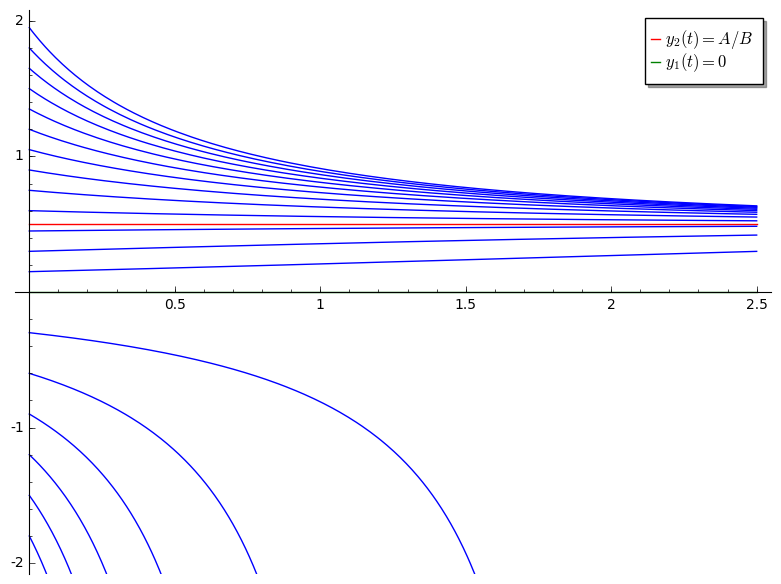

In [6]:
import numpy as np
t = var('t')
B = 1
A = 0.5
T = 2.5
y0 = np.arange(0.15, 2, 0.15)
p = plot(A/B, (t, 0, T), legend_label='$y_2(t) = A/B$', color='red')
p += plot(0, (t, 0, T), legend_label='$y_1(t)=0$', color='green')
for val in y0:
    p += plot(A/(B + (A/val - B)*exp(-A*t)), (t, 0, T))

y0 = np.arange(-0.3, -2, -0.3)
print(y0)
for val in y0:   
    a = solve(B + (A/val - B)*exp(-A*t)==0, t)
    e = a[0].right_hand_side()
    p += plot(A/(B + (A/val - B)*exp(-A*t)), (t, 0, e-0.2), ymin=-2, ymax=2)
show(p)

[ 1.3  1.6  1.9  2.2  2.5  2.8]


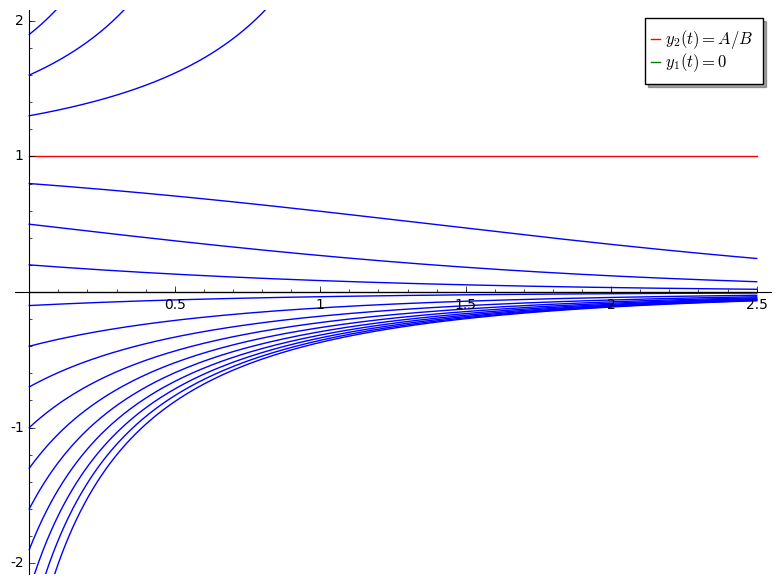

In [3]:
import numpy as np
t = var('t')
B = -1
A = -1
T = 2.5
y0 = np.arange(0.8, -3, -0.3)
p = plot(A/B, (t, 0, T), legend_label='$y_2(t) = A/B$', color='red')
p += plot(0, (t, 0, T), legend_label='$y_1(t)=0$', color='green')
for val in y0:
    p += plot(A/(B + (A/val - B)*exp(-A*t)), (t, 0, T))

y0 = np.arange(1.3, 3, 0.3)
print(y0)
for val in y0:   
    a = solve(B + (A/val - B)*exp(-A*t)==0, t)
    e = a[0].right_hand_side()
    p += plot(A/(B + (A/val - B)*exp(-A*t)), (t, 0, e-0.2), ymin=-2, ymax=2)
show(p)

** 为什么要判断方程的稳定性态？ **

* 特解依赖初值
* 初值不可避免存在误差
* 特解不稳定， 则算出的解就不可靠
* 大多数非线性方程没有解析解或很难求出解析解， 如何在不求出解析解的情况下，判断解的稳定性就很重要。

** 简化问题 **

* 关心特解 $y = \phi(t)$ 处的性态
* 利用 $ x = y - \phi(t)$ 转化为特解 $x = 0$ 邻近解的性态的问题。

## 6.1.3 按线性近似决定稳定性

$$
\frac{\mathrm d \mathbf x}{\mathrm d t} = \mathbf A \mathbf x
$$

$\mathbf x'=\mathbf A\mathbf x$ 的满足 $\mathbf \varphi(0)=\mathbf \eta$ 的解:

$$
\mathbf \varphi(t)=\sum_{j=1}^k e^{\lambda_jt}[\sum_{i=0}^{n_j-1}\frac{t^i}{i!}(\mathbf A-\lambda_j\mathbf E)^i]\mathbf v_j
$$
其中 $\mathbf v_j(j=1,2,\cdots,k)$ 满足

$$
(\mathbf A-\lambda_j \mathbf E)^{n_j}\mathbf v_j=0.
$$

$$
\mathbf \eta = \sum_j \mathbf v_j
$$

**第 5 章定理 11** （P235)
1. 如果 $\mathbf A$ 的特征值的实部都是负的，则方程组的的任一解当 $t\rightarrow +\infty$ 时都趋于零;
2. 如果 $\mathbf A$ 的特征值的实部都是非正的， 且实部为 0 的特征值都是简单特征值，则方程组的任一解当 $t\rightarrow +\infty$ 时都保持有界；
3. 如果 $\mathbf A$ 的特征值至少有一个具有正实部，则方程至少有一个解当 $t\rightarrow +\infty$ 时趋于正无穷。

** 定理 1 **
1. 如果 $\mathbf A$ 的特征值的实部都是负的，方程组的零解是渐近稳定的。
2. 如果 $\mathbf A$ 的存在正实部特征值，则方程方程组的零解是不稳定的。
3. 如果 $\mathbf A$ 的没有正实部特征值的， 但有 0 或 具有 0 实部的特征值，则方程组的 0 解可能是稳定的也可能是不稳定的，要看 0 或具有 0 实部的特征值的重数是否为 1；

下面考虑非线性微分方程组
$$
\frac{\mathrm d \mathbf x}{\mathrm d t} = \mathbf A \mathbf x + \mathbf R(\mathbf x)
$$
其中 
$\mathbf R(0) = \mathbf 0$, 且满足条件
$$
\frac{\| \mathbf R(\mathbf x)\|}{\|\mathbf x\|}\xrightarrow{\|\mathbf x\|\rightarrow 0} 0 
$$

上述方程的稳定性和 $\frac{\mathrm d \mathbf x}{\mathrm d t} = \mathbf A \mathbf x$ 的稳定性有什么关系呢？

** 定理 2 （按线性近似决定稳定性问题）** 
当线性方程组的没有 0 根或 0 实部的根， 则非线性方程组的 $\mathbf 0$ 解的稳定性态与线性近似方程组的 $\mathbf 0$ 解的稳定性态一致， 即：
1. 如果 $\mathbf A$ 的特征值的实部都是负的，方程组的零解是渐近稳定的。
2. 如果 $\mathbf A$ 的存在正实部特征值，则方程方程组的零解是不稳定的。